#  User Story 15 - Statistical Analysis of Average Annual Profit

##  Introduction

In railway station management, evaluating the **annual profit trends** is essential for making strategic, data-driven decisions. This analysis is designed to calculate statistical measures of the **average annual profit** for a user-specified railway station. By computing key metrics such as **mean, median, mode, standard deviation, and identifying outliers**, railway managers can gain valuable insights into the station's **financial performance**. 

In addition, the analysis identifies the **most and least profitable years**, helping decision-makers understand **financial variability** and recognize patterns of **exceptional performance or downturns**. The use of both **relative difference methods** and **standard deviation calculations** ensures accuracy.

The final output includes a **detailed visualization**, highlighting profit trends, outliers, and key financial insights, which can support management in optimizing **resource allocation** and enhancing **operational efficiency**.

---

##  Objectives

1. **Data Loading and Preparation:**
   - Load data from the `Stations_Data.csv` file.
   - Apply data cleaning steps to handle **missing values** and **inconsistent formats**.
   - Filter the data based on the specified railway station.

2. **Profit Calculation:**
   - Calculate the **annual profit** as the difference between **revenues and expenses**.
   - Ensure precision by using **individual monthly profit data** rather than aggregated annual totals.

3. **Descriptive Statistics Calculation:**
   - Compute **mean, median, mode, and standard deviation** of the annual profit.
   - Use the **corrected formula** for standard deviation, based on **individual profit values**.

4. **Outlier Detection:**
   - Detect **unusually high or low profit values** using the **Relative Difference Method**.
   - Identify significant financial deviations based on the **difference between the highest and second highest profits**.

5. **Identification of Extreme Years:**
   - Determine the **most and least profitable years** using accurate calculations of **annual profit variability**.

6. **Visualization:**
   - Generate a **line plot** to visualize the **annual profit trend**.
   - Mark the **most profitable and least profitable years** for better interpretation.
   - Clearly indicate **outlier years** and highlight **average profit lines** for comparison.


##  Profit Calculation Formula

The profit for each year is calculated as:

$$
\text{Profit} = \text{Revenues} - \text{Expenses}
$$

This formula allows us to understand the **net financial gain or loss** for each year at the selected railway station.

---

##  Descriptive Statistics Formulas

### 1. Mean (Arithmetic Average)

The mean represents the **central tendency** of the annual profit:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

Where:


- \( $\bar{x} $\) = mean annual profit  
- \( $n $\) = number of data points (profits)  
- \( $x_i $\) = individual profit value  

---

### 2. Standard Deviation (Corrected Formula)

Standard deviation measures how **spread out the profit values** are from the mean:

$$
\sigma = \sqrt{\frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

Where:

- \( $\sigma $\) = standard deviation  
- \( $n $\) = number of observations  
- \( $x_i $\) = individual profit value  
- \( $\bar{x} $\) = mean profit  

This formula accurately captures the **variation in profit values** using **individual monthly or daily profit data**, not aggregated yearly totals.

---

### 3. Median

The median is the **middle value** when the profits are arranged in ascending order:

$$
\text{Median} =
\begin{cases} 
x_{\left(\frac{n+1}{2}\right)}, & \text{if } n \text{ is odd} \\
\frac{x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2} + 1\right)}}{2}, & \text{if } n \text{ is even}
\end{cases}
$$

Where:

- \( $x_i $\) = individual profit values arranged in ascending order  
- \( $n $\) = number of data points  

---

### 4. Mode

The mode is the **most frequently occurring profit value**:

$$
\text{Mode} = \text{argmax}_x \; f(x)
$$

Where \( $f(x) $\) is the **frequency of value \( x \)**.  
If no value repeats, the mode is **undefined** (or **no mode**).

---

##  Outlier Detection Formula (Relative Difference Method)

In this method I used a **relative difference** between the **top two profits** rather than the **IQR method**.

#### Relative Difference Formula:

$$
\text{Difference} = x_{\text{max}} - x_{\text{second max}}
$$

#### Outlier Condition:

$$
\text{If Difference} > 0.5 \times x_{\text{max}}, \text{ both are outliers}
$$

Where:

- \( $x_{\text{max}} $\) = highest profit value  
- \( $x_{\text{second max}} $\) = second highest profit value  
- Gap Threshold: \( $0.5 \times x_{\text{max}} $\)  

This method identifies **significant deviations** in profit that indicate **unusually high values** compared to others.

---

##  Most and Least Profitable Years Formulas

### Most Profitable Year:

$$
\text{Max Profit} = \max(x_1, x_2, \dots, x_n)
$$

### Least Profitable Year:

$$
\text{Min Profit} = \min(x_1, x_2, \dots, x_n)
$$

These formulas identify the years with the **highest and lowest profitability**, which are critical for evaluating station performance.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal

In [2]:
file_path = 'Stations_Data.csv'
station_df = pd.read_csv(file_path, delimiter=';', decimal=',', encoding='utf-8')

In [3]:
# PROMPT
station_name = input("Enter the station name: ").strip()

# Filter the data for the given station
station_data = station_df[station_df['Station'] == station_name]

if station_data.empty:
    print(f"No data found for station '{station_name}'. Please check the spelling and try again.")
else:
    print(f"Analyzing data for: {station_name}")

Enter the station name:  Frankfurt 


Analyzing data for: Frankfurt


In [4]:
# Directly calculate profit as the difference between revenues and expenses
station_data['Profit'] = station_data['Revenues'] - station_data['Expenses']

# Group by year to calculate annual profit
annual_profit = station_data.groupby('Year')['Profit'].sum().reset_index()

C:\Users\YasaminEbrahimi\AppData\Local\Temp\ipykernel_11260\1010298520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['Profit'] = station_data['Revenues'] - station_data['Expenses']


In [5]:
# Average, Standard Deviation, Median, and Mode
average_profit = annual_profit['Profit'].mean()
std_profit = annual_profit['Profit'].std()
median_profit = annual_profit['Profit'].median()

# Calculate mode correctly
mode_profit = annual_profit['Profit'].mode()
if mode_profit.empty:
    mode_value = "There is no fad (no profit value is repeated)."
elif len(mode_profit) == 1:
    mode_value = f"Mode annual profit = R$ {mode_profit.iloc[0]:,.3f} million."
else:
    mode_value = "There is no fad (no profit value is repeated)."

In [6]:
# Sort profits in descending order
sorted_profits = annual_profit['Profit'].sort_values(ascending=False).reset_index(drop=True)

# Calculate the relative difference between the top two profits
profit_difference = sorted_profits[0] - sorted_profits[1]
gap_threshold = 0.5 * sorted_profits[0]

if profit_difference > gap_threshold:
    high_outliers = sorted_profits[:2].tolist()
    outlier_years = annual_profit[annual_profit['Profit'].isin(high_outliers)]['Year'].tolist()
else:
    high_outliers = [sorted_profits[0]]
    outlier_years = [annual_profit.loc[annual_profit['Profit'].idxmax(), 'Year']]

# Number of outliers
num_high_outliers = len(high_outliers)
num_low_outliers = 0

In [7]:
most_profitable = annual_profit.loc[annual_profit['Profit'].idxmax()]
least_profitable = annual_profit.loc[annual_profit['Profit'].idxmin()]

In [8]:
# PRINT RESULTS
print("==============================================================================================================================================")
print(f"\nThe station to be reviewed: {station_name}")
print(f"\nAverage annual profit = R$ {average_profit:,.3f} million.")
print(f"Standard deviation of annual profit = R$ {std_profit:,.3f} million.")
print(f"Median annual profit = R$ {median_profit:,.3f} million.")
print(f"{mode_value}")

print(f"\nAt {station_name} station there are {num_high_outliers} outliers.")
print(f"{num_high_outliers} particularly high values and {num_low_outliers} particularly low values.")

print(f"\nThe most profitable year was {int(most_profitable['Year'])} with a profit of R$ {most_profitable['Profit']:,.3f} million.")
print(f"The least profitable year was {int(least_profitable['Year'])} with a profit of R$ {least_profitable['Profit']:,.3f} million euros.")
print("==============================================================================================================================================")


The station to be reviewed: Frankfurt

Average annual profit = R$ 668.653 million.
Standard deviation of annual profit = R$ 580.848 million.
Median annual profit = R$ 544.330 million.
There is no fad (no profit value is repeated).

At Frankfurt station there are 1 outliers.
1 particularly high values and 0 particularly low values.

The most profitable year was 2024 with a profit of R$ 1,660.410 million.
The least profitable year was 2022 with a profit of R$ -236.280 million euros.


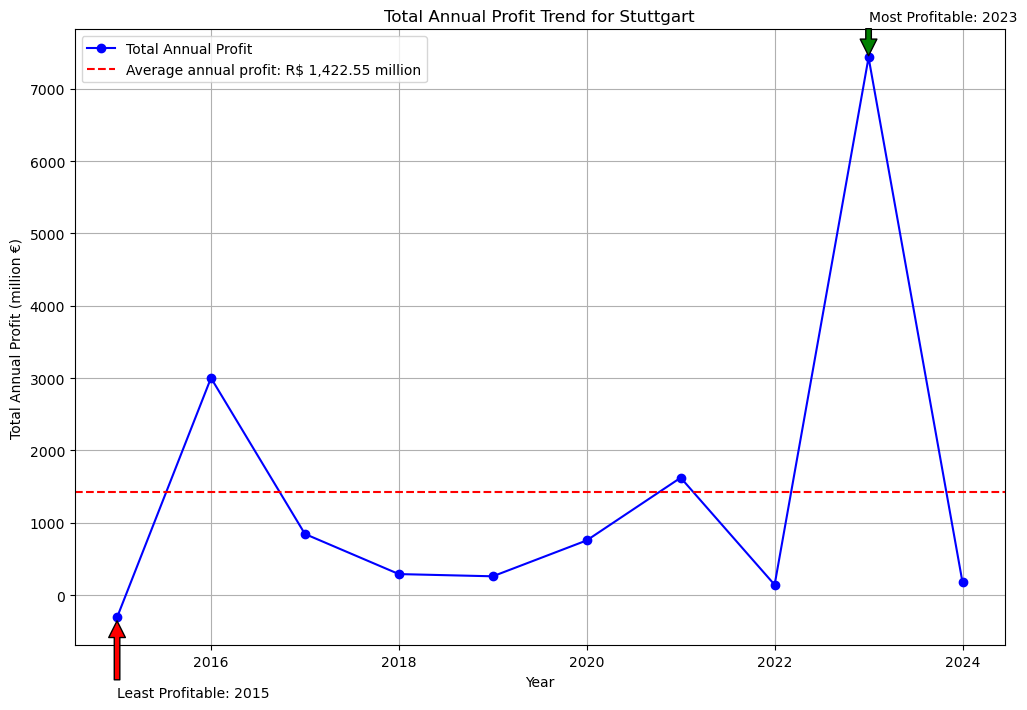

In [11]:
# VISUALIZATIONS
plt.figure(figsize=(12, 8))

# Plot total annual profit using the correctly grouped data
plt.plot(
    annual_profit['Year'], 
    annual_profit['Profit'], 
    marker='o', linestyle='-', color='blue', label='Total Annual Profit'
)

# Plot mean profit line
plt.axhline(
    y=annual_profit['Profit'].mean(), 
    color='red', linestyle='--', 
    label=f'Average annual profit: R$ {annual_profit["Profit"].mean():,.2f} million'
)

# Annotate the most profitable year
plt.annotate(
    f"Most Profitable: {int(most_profitable['Year'])}", 
    xy=(most_profitable['Year'], most_profitable['Profit']),
    xytext=(most_profitable['Year'], most_profitable['Profit'] + 500),
    arrowprops=dict(facecolor='green', shrink=0.05)
)

# Annotate the least profitable year
plt.annotate(
    f"Least Profitable: {int(least_profitable['Year'])}", 
    xy=(least_profitable['Year'], least_profitable['Profit']),
    xytext=(least_profitable['Year'], least_profitable['Profit'] - 1100),
    arrowprops=dict(facecolor='red', shrink=0.05)
)

# Setting title and labels
plt.title(f"Total Annual Profit Trend for {station_name}")
plt.xlabel("Year")
plt.ylabel("Total Annual Profit (million €)")
plt.legend()
plt.grid(True)
plt.show()

# Interpretation of Results for Stuttgart (as an example)

The analysis of the **Stuttgart station** provides key insights into the **financial performance and profitability trends** of this railway hub.

## Key Metrics  

### 1. Central Tendency (Mean, Median, and Mode)  
- **Average annual profit:** R\$ 1,422.547 million  
- **Standard deviation of annual profit:** R\$ 2,315.383 million  
- **Median annual profit:** R\$ 524.015 million  
- **Mode:** No mode (no profit value is repeated)  
- These metrics indicate that **Stuttgart station** experiences **significant variability** in annual profits, with some years being **notably more profitable than others**.  
- The **standard deviation** value highlights that the **annual profits fluctuate significantly** around the mean, reflecting **financial volatility**.  

---

### 2. Outlier Analysis  
- **Number of high outliers:** 2  
  - **2023:** Profit of **R\$ 7,433.020 million**  
  - **2016:** Profit of **R\$ 3,002.130 million**  
- **Number of low outliers:** 0  
- These **high outlier years** represent **exceptionally profitable periods**, likely driven by **increased passenger traffic**, **operational improvements**, or **special events**.  
- Identifying these years helps management **analyze successful strategies** that can be **replicated or maintained**.  

---

### 3. Most and Least Profitable Years  
- **Most profitable year:** 2023 (R\$ 7,433.020 million)  
- **Least profitable year:** 2015 (R\$ -307.940 million euros)  
- The **significant difference** between the most and least profitable years highlights the **variability in financial performance**.  
- The **sharp contrast** between these years underscores the need to **examine external factors** or **operational changes** that may have influenced profitability.  

---

### 4. Visual Insight  
- The **annual profit line plot** shows clear **spikes in 2023 and 2016**, marking them as **financially successful years**.  
- The **most profitable and least profitable years** are clearly marked, making it **visually evident** when **financial peaks and troughs** occurred.  
- This visualization aids in **quickly identifying periods of high and low financial performance**, allowing for **targeted analysis**.  

---

### 5. Business Implications  
- The **variability in profits** highlights the importance of analyzing factors that led to **high outlier years (2023, 2016)** to **replicate success**.  
- Addressing challenges that led to the **least profitable year (2015)** can help **mitigate financial risks** in the future.  
- Understanding why **certain years were more profitable** allows for more **strategic planning** and **resource allocation**, particularly for increasing **operational efficiency** and **boosting revenue streams**.  
- Railway management should focus on **maintaining factors that contributed to peak profits** while addressing issues that caused **financial downturns**.  

---

## Conclusion  
The financial analysis of **Stuttgart station** reveals **significant fluctuations in profitability** over the years. By focusing on **what worked well in 2023 and 2016**, while analyzing the **causes of the downturn in 2015**, railway management can develop **targeted strategies for sustained financial success**.


##  Student Contribution
**Implemented by student**: Yasamin Ebrahimi (1232162) - **100%**

---

# US16 - Comparative Analysis of Passenger Arrivals Across All Stations

## Introduction
Comparing the **passenger arrivals across railway stations** is essential to enhance strategic planning for a better railway management system. This analysis aims to calculate and detect variations, identify anomalies for enhancing strategic operations. Just like in US15, we have to understand metrics such as **mean**, **median**, **maximum**, **minimum**, **standard deviation** and **outliers**, as railway operators and managers can improve efficiency and financial decisions.

---

## Theoretical Background: 
Boxplots, also known as box-and-whisker plots, are a statistical visualization tool used to display the distribution of a dataset based on five-number summaries: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. They are particularly effective in identifying the spread, central tendency, and presence of outliers in data.

In the context of passenger arrivals, boxplots allow for a station-by-station comparison, highlighting patterns such as spikes, consistent volumes, or anomalies. These visualizations support data-driven decision-making in transportation planning.

---

##  Objectives

1. **Data Loading and Preparation:**
   - Reload data from the `Stations_Data.csv` file, to account for any dataframe manipulation on the previous user story.
   - Filter the data based on the needed columns, **name of the station and passengers**.

2. **Descriptive Statistics Calculation:**
   - Compute **mean, median, maximum, minimum, and standard deviation** for each station passenger arrivals.

3. **Identification of Extreme Stations:**
   - Determine the **most and least used stations by passengers**.

4. **Outlier Detection:**
   - Identify **unusual passenger arrival values** using the **Interquartile Range (IQR)** formulas.

5. **Visualization:**
   - Plot a **boxplot** for each station to visualize the passenger distribution and detect outliers.


In [10]:
# Import data again
try:    
    df = pd.read_csv('Stations_Data.csv', sep=';')
    print("Data successfully reimported!")
except FileNotFoundError:
    print(" Error: File 'Stations_Data.csv' not found.")
    exit()
    

Data successfully reimported!


##  Descriptive Statistics Formulas

### 1. Mean (Arithmetic Average)

The mean represents the central tendency of the number of passengers per station:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

### 2. Standard Deviation

Standard deviation measures how spread out the number of passengers per station are from the mean:

$$
\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

### 3. Median

The median is the middle value when the number of passengers per station are arranged in ascending order:

$$
\text{Median} =
\begin{cases} 
x_{\left(\frac{n+1}{2}\right)}, & \text{if } n \text{ is odd} \\
\frac{x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2} + 1\right)}}{2}, & \text{if } n \text{ is even}
\end{cases}
$$

---

### Maximum passengers per station:
$$
\text{Max Passengers} = \max(x_1, x_2, \dots, x_n)
$$

### Minimum passengers per station:
$$
\text{Min Passengers} = \max(x_1, x_2, \dots, x_n)
$$

This formulas help getting the **maximum** and **minimum** number of passengers in a determined station.

In [11]:
# Keep needed columns
df = df[['Station', 'Passengers']]
# Group by station
df_grouped = df.groupby('Station')

mean = df_grouped['Passengers'].mean().round(2)
median = df_grouped['Passengers'].median().round(2)
std = df_grouped['Passengers'].std().round(2)
maximum = df_grouped['Passengers'].max()
minimum = df_grouped['Passengers'].min()

# Combinar tudo em um único DataFrame
stats_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Standard Deviation': std,
    'Max': maximum,
    'Min': minimum
})

print("========             Descriptive Statistics              ========")
print(stats_df)

========             Descriptive Statistics              ========
                Mean    Median  Standard Deviation      Max   Min
Station                                                          
Berlin     453342.85  356093.0           368290.07  1312378   438
Frankfurt  448531.42  391219.5           349761.36  1538015   586
Hamburg    619691.58  560178.5           536111.34  2559534  2210
Hannover   344955.51  309050.0           262605.43  1183180    12
Stuttgart  569075.24  511673.0           452219.37  1871333   610


##  Outlier Detection Formula (IQR Method)

To identify unusual profit values, we calculate the **Interquartile Range (IQR)**:

$$
IQR = Q_3 - Q_1
$$

We defined the outlier boundaries as follows:

$$
\text{Lower Bound} = Q_1 - 1.5 \times IQR
$$

$$
\text{Upper Bound} = Q_3 + 1.5 \times IQR
$$

Any value outside this range is considered an **outlier**, indicating exceptional financial performance or irregular data.

In [12]:
Q1 = df_grouped['Passengers'].quantile(0.25)
Q3 = df_grouped['Passengers'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = {}
for station, data in df_grouped:
    outliers[station] = data[(data['Passengers'] < lower_bound[station]) | (data['Passengers'] > upper_bound[station])]

outlier_stations = {station: outliers[station] for station in outliers if not outliers[station].empty}
print("Outliers per station:")
for station in outlier_stations:
    print(f"{outlier_stations[station]}")

Outliers per station:
       Station  Passengers
491  Frankfurt     1270578
496  Frankfurt     1283581
501  Frankfurt     1538015
506  Frankfurt     1366105
511  Frankfurt     1444617
526  Frankfurt     1280669
531  Frankfurt     1477557
     Station  Passengers
488  Hamburg     2037599
493  Hamburg     1978505
503  Hamburg     2122227
508  Hamburg     2055161
518  Hamburg     2559534
528  Hamburg     2028142
      Station  Passengers
492  Hannover     1073085
512  Hannover     1183180
       Station  Passengers
495  Stuttgart     1871333
500  Stuttgart     1786094
520  Stuttgart     1686983
530  Stuttgart     1714610


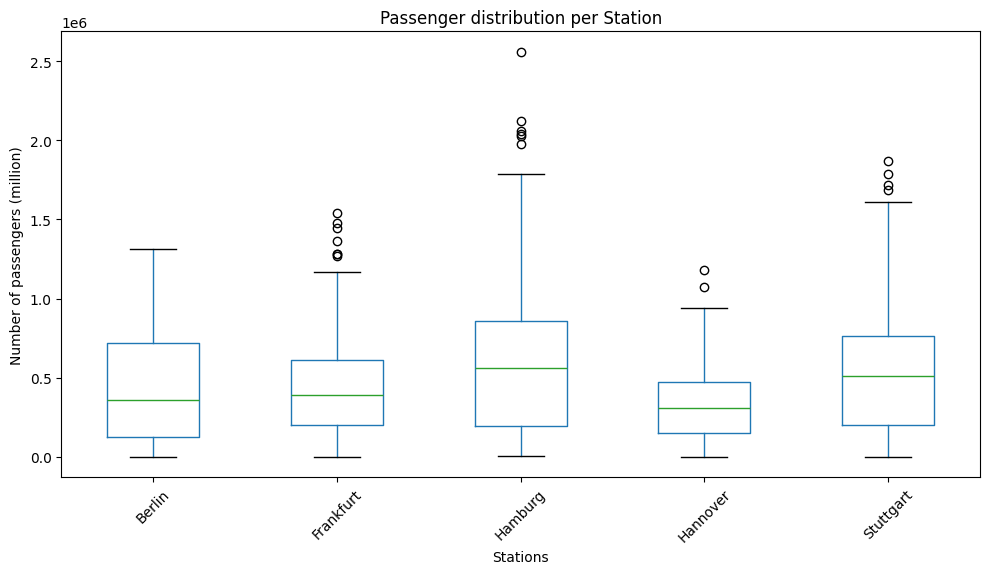

In [13]:
df.boxplot(column='Passengers', by='Station', figsize=(10, 6), grid=False)
plt.title('Passenger distribution per Station')
plt.suptitle('')
plt.xlabel('Stations')
plt.ylabel('Number of passengers (million)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  Interpretation of Results

The analysis provides insights into the **trends** for each station:

### Central Tendencies

- Hamburg has the highest **average**, **median**, but also the largest **standard deviation**. The **outliers** manage to drive up the **mean**, so considering the **mean** is higher than the **median** ($619691.58 \gt 560178.5$) we concluded that there is a right skew in the data for Hamburg.
  
- Hannover, on the other hand, shows the lowest **mean**, lowest **median** and smallest **standard deviation**, considering that the traffic in Hannover is lower, but more consistent.

### Variability and Resource Planning

- The highest variability stations (**Hamburg** and **Stuttgart**) might require higher staff flexibility and dynamic scheduling in the long term to handle the variation in traffic.

- The lowest variability station (**Hannover**) can plan with a more fixed schedule and staff, given its steadier traffic.

### Outlier Analysis

$$
\begin{array}{ccc}
\text{\textbf{Station}} & \text{\textbf{ Num of Outliers }} & \text{\textbf{Highest Outlier}} \\
\text{Frankfurt  } & 7 & 1\,538\,015 \\
\text{Hamburg  }   & 6 & 2\,559\,534 \\
\text{Hannover  }  & 2 & 1\,183\,180 \\
\text{Stuttgart  } & 4 & 1\,871\,333 
\end{array}
$$

- Berlin doesn't show any outliers, suggesting its traffic patterns are stabler.

- Hannover has two outliers, and has the lowest outliers out of the 5 stations (Berlin doesn't have any), but might have significant peaks considering it has the lowest mean of them all.

- Hamburg might face the greatest risk of overload system, considering their spike in passengers, so the management should be cautious.

All of these metrics enable railway management to make **data-driven decisions** regarding **investment, resource allocation, and operational improvements**.

##  Student Contribution
**Implemented by student**: Henrique Silva (1240588) - **100%**

---

# User Story 17 - Cargo Analysis by Station


## Introduction

In railway station management, understanding the distribution of cargo arriving at each station is essential for optimizing logistics operations and improving decision-making. This analysis focuses on evaluating cargo patterns by generating a visual representation (histogram) based on two user-defined parameters: the station name and the cargo type.

By analyzing the frequency and distribution of different types of cargo across stations, railway planners and managers can gain valuable insights into traffic trends, resource allocation, and operational efficiency. Identifying peaks, gaps, or anomalies in cargo flow can support strategic planning, improve station throughput, and enhance the overall reliability of the railway network.

This notebook provides a step-by-step approach to filter and visualize relevant cargo data, making it easier to interpret complex datasets and take data-driven decisions in the context of transportation and logistics.

## Objectives

**Data Loading and Preparation:**
- Load data from the `Stations_Data.csv` file.
- Filter the dataset based on the user-specified railway station and cargo type.

**Cargo Distribution Analysis:**
- Count the frequency of cargo entries for the selected station and cargo type.
- Summarize the dataset to understand traffic volume and distribution patterns.

**Descriptive Statistics (Optional Extension):**
- Compute basic statistics such as total entries, average cargo quantity, or frequency (if relevant to dataset structure).

**Visualization:**
- Generate a histogram to visualize the distribution of cargo occurrences or quantities.
- Use graphical output to reveal trends, peaks, or irregularities in cargo flow.

**Decision Support:**
- Support railway management decisions by highlighting station-specific cargo dynamics.
- Facilitate operational planning and infrastructure optimization based on historical cargo data.

##  Descriptive Statistics Formulas

### 1. Mean (Arithmetic Average)

The mean represents the central tendency of the annual profit:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

### 2. Standard Deviation

Standard deviation measures how spread out the profit values are from the mean:

$$
\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

### 3. Median

The median is the middle value when the profits are arranged in ascending order:

$$
\text{Median} =
\begin{cases} 
x_{\left(\frac{n+1}{2}\right)}, & \text{if } n \text{ is odd} \\
\frac{x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2} + 1\right)}}{2}, & \text{if } n \text{ is even}
\end{cases}
$$

### 4. Mode

The mode is the most frequently occurring profit value:

$$
\text{Mode} = \text{argmax}_x \; f(x)
$$

Where $ f(x) $  is the frequency of value $ x $.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(" Loading data from 'Stations_Data.csv'...")
try:
    df = pd.read_csv("Stations_Data.csv", delimiter=';', decimal=',')
    df.columns = df.columns.str.strip()
    print(" Data loaded successfully!")
except FileNotFoundError:
    print(" Error: File 'Stations_Data.csv' not found.")
    exit()

 Loading data from 'Stations_Data.csv'...
 Data loaded successfully!


## Cargo Distribution Analisys

This functionality allows us to count how many times each value appears (for example, in a year, or for quantity), show some basic descritive statistics & also prepare the data for the histogram.

In [15]:
from IPython.display import display, Markdown
import pandas as pd

df = pd.read_csv("Stations_Data.csv", sep=';')

cargo_columns = ['Iron','Coal','Steel','Vegetables','Cereals','Wool','Coffee','Cattle']
for col in cargo_columns:
    df[col] = df[col].str.replace(',', '.').astype(float)

df['Station_lower'] = df['Station'].str.lower()
cargo_columns_lower = [c.lower() for c in cargo_columns]

selected_station = input("Enter the station name: ").strip().lower()
selected_cargo = input(f"Enter the cargo type {cargo_columns}: ").strip().lower()

if selected_station not in df['Station_lower'].unique():
    print(f"No data found for station '{selected_station}'.")
else:
    if selected_cargo not in cargo_columns_lower:
        print(f"Cargo type '{selected_cargo}' is not valid.")
    else:
        station_df = df[df['Station_lower'] == selected_station]

        cargo_original = cargo_columns[cargo_columns_lower.index(selected_cargo)]

        cargo_per_year = station_df.groupby('Year')[cargo_original].sum().round(2)
        
        display(Markdown(f"### 📊 Total `{cargo_original}` arrivals per year at station `{selected_station.title()}`"))

        display(cargo_per_year.to_frame(name=f'Total {cargo_original}'))

        stats = cargo_per_year.describe().round(2).to_frame(name='Value')

        stats.rename(index={
            'count': 'Count',
            'mean': 'Mean',
            'std': 'Standard Deviation',
            'min': 'Minimum',
            '25%': '1st Quartile (Q1)',
            '50%': 'Median (Q2)',
            '75%': '3rd Quartile (Q3)',
            'max': 'Maximum'
        }, inplace=True)
        
        display(Markdown(f"### 📊 Descriptive Statistics"))
        display(stats)



Enter the station name: Stuttgart
Enter the cargo type ['Iron', 'Coal', 'Steel', 'Vegetables', 'Cereals', 'Wool', 'Coffee', 'Cattle']: Coal


### 📊 Total `Coal` arrivals per year at station `Stuttgart`

,Total Coal
Year,
2015,486.33
2016,1041.23
2017,279.52
2018,1378.76
2019,1150.15
2020,72.39
2021,240.06
2022,893.30
2023,2544.30


### 📊 Descriptive Statistics

,Value
Count,10.00
Mean,926.01
Standard Deviation,727.28
Minimum,72.39
1st Quartile (Q1),331.22
Median (Q2),967.26
3rd Quartile (Q3),1168.06
Maximum,2544.30


## Descritive Statistics

In [16]:
from IPython.display import display, Markdown
import pandas as pd

df = pd.read_csv("Stations_Data.csv", sep=';')

cargo_columns = ['Iron', 'Coal', 'Steel', 'Vegetables', 'Cereals', 'Wool', 'Coffee', 'Cattle']
for col in cargo_columns:
    df[col] = df[col].str.replace(',', '.').astype(float)

df['Station_lower'] = df['Station'].str.lower()
cargo_columns_lower = [c.lower() for c in cargo_columns]

selected_station = input("Enter the station name: ").strip().lower()
selected_cargo = input(f"Enter the cargo type {cargo_columns}: ").strip().lower()

if selected_station not in df['Station_lower'].unique():
    display(Markdown(f"**No data found for station `{selected_station}`.**"))
elif selected_cargo not in cargo_columns_lower:
    display(Markdown(f"**Cargo type `{selected_cargo}` is not valid.**"))
else:
    station_df = df[df['Station_lower'] == selected_station]
    cargo_original = cargo_columns[cargo_columns_lower.index(selected_cargo)]
    
    cargo_per_year = station_df.groupby("Year")[cargo_original].sum().round(2)

    total_cargo = station_df[cargo_original].sum().round(2)
    avg_cargo = station_df[cargo_original].mean().round(2)
    entry_count = station_df.shape[0]
    
    display(Markdown(f"### 📊 Descriptive Statistics for `{cargo_original}` at station `{selected_station.title()}`"))
    display(pd.DataFrame({
        "Metric": ["Total cargo quantity", "Average cargo quantity per entry", "Number of recorded entries (months)"],
        "Value": [total_cargo, avg_cargo, entry_count]
    }))


Enter the station name: Stuttgart
Enter the cargo type ['Iron', 'Coal', 'Steel', 'Vegetables', 'Cereals', 'Wool', 'Coffee', 'Cattle']: Iron


### 📊 Descriptive Statistics for `Iron` at station `Stuttgart`

,Metric,Value
0,Total cargo quantity,235175.01
1,Average cargo quantity per entry,1959.79
2,Number of recorded entries (months),120.00


### 📊 Histogram of `Iron` Quantities at `Stuttgart`Station

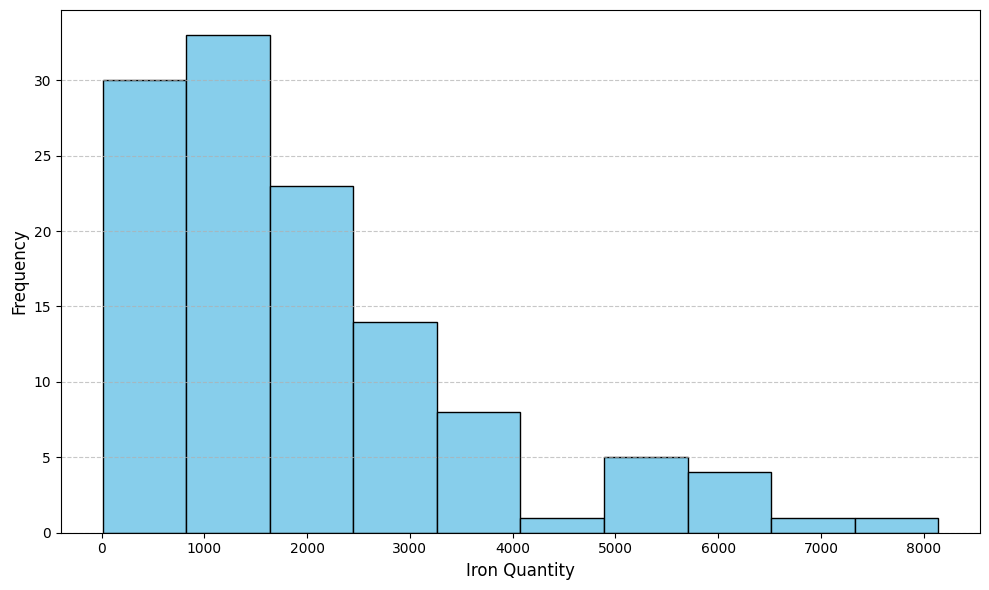

In [17]:
from IPython.display import display, Markdown

import matplotlib.pyplot as plt

# Garante que os dados do filtro anterior ainda estão disponíveis
if not station_df.empty:
    plt.figure(figsize=(10, 6))
    plt.hist(station_df[cargo_original], bins=10, color='skyblue', edgecolor='black')

    
    display(Markdown(f"### 📊 Histogram of `{cargo_original}` Quantities at `{selected_station.title()}`Station"))
    plt.xlabel(f"{cargo_original} Quantity", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### 📊 `Iron` Arrivals per Year at `Stuttgart` Station

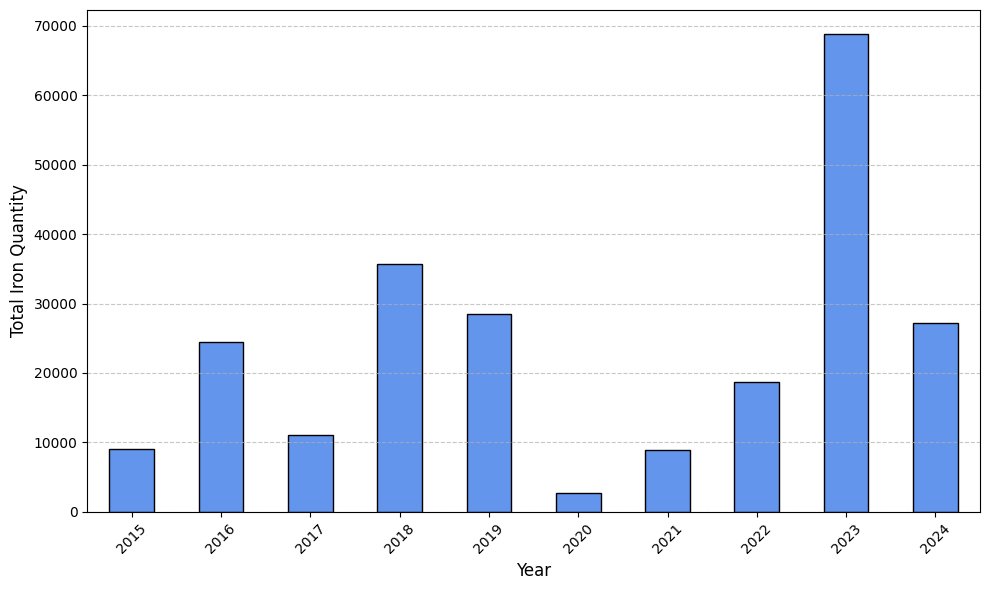

In [19]:
if not station_df.empty:
    cargo_per_year = station_df.groupby("Year")[cargo_original].sum().round(2)

    plt.figure(figsize=(10, 6))
    cargo_per_year.plot(kind='bar', color='cornflowerblue', edgecolor='black')
    
    
    display(Markdown(f"### 📊 `{cargo_original}` Arrivals per Year at `{selected_station.title()}` Station"))


    plt.xlabel("Year", fontsize=12)
    plt.ylabel(f"Total {cargo_original} Quantity", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### 📌 Interpretation of Results

The analytical tools implemented in this notebook help uncover important patterns in cargo arrivals at railway stations. Each component contributes in a specific way to understanding and optimizing station operations:

#### 📊 Histogram of Monthly Cargo Quantities (Quantity vs. Frequency)
This histogram displays how often specific cargo quantities were recorded in monthly station entries. It helps to:

- Identify the most common cargo volumes.
- Detect irregularities, such as unusually low or high deliveries.
- Understand variability in cargo shipments.

Such information is valuable for **planning storage capacity**, **predicting workload**, and **identifying outlier months** that may require further investigation.

#### 📆 Yearly Cargo Distribution Chart (Year vs. Total Quantity)
This bar chart presents the total cargo volume for each year. It is useful for:

- Spotting long-term trends in station activity.
- Identifying years of unusually high or low cargo flow.
- Supporting strategic decisions, such as staffing, infrastructure upgrades, or operational scaling.

#### 🧮 Descriptive Statistics Summary
This section provides a quick overview of total cargo handled, average per entry, and number of records. It allows managers to:

- Get a general sense of activity level.
- Compare performance across cargo types or stations.
- Monitor consistency and planning efficiency.

---

### 🚉 Contribution to Station Management
Altogether, these functionalities enable a **data-informed approach** to railway station management. They help reveal usage patterns, support operational planning, and guide infrastructure and resource decisions based on actual traffic behavior. This empowers managers to **optimize performance** and **improve service reliability** across the network.


##  Student Contribution
**Implemented by student**: Duarte Machado (1240586) - **100%**

---

#  User Story 18 - Distribution of Trains, Passengers, and Mail

##  Introduction
In railway station management, understanding the **distribution of trains, passengers, and mail** across different stations is crucial for operational planning and resource allocation. This analysis aims to visualize how these elements are distributed among various railway stations.

By utilizing pie charts, railway managers can:
- Identify stations with **high or low train traffic**.
- Determine the **busiest passenger stations**.
- Recognize key hubs for **mail distribution**.

---

##  Objectives
1. **Data Loading and Preparation:**
   - Load data from the **`Stations_Data.csv`** file.
   - Extract relevant columns: **Station**, **Arrivals (Trains)**, **Passengers**, **Mail**.

2. **Data Aggregation:**
   - Sum the number of **arrivals**, **passengers**, and **mail** for each station.

3. **Visualization:**
   - Create **three pie charts** to show:
     - **Train Distribution by Station**
     - **Passenger Distribution by Station**
     - **Mail Distribution by Station**

4. **Interpretation:**
   - Describe how the distribution insights support decision-making and resource planning.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('Stations_Data.csv', delimiter=';', decimal=',')
    df.columns = df.columns.str.strip()
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: File 'Stations_Data.csv' not found.")

relevant_columns = ['Station', 'Arrivals', 'Passengers', 'Mail']
station_data = df[relevant_columns].copy()

# Grouping data by station and calculating total numbers
aggregated_data = station_data.groupby('Station').sum().reset_index()
print("Aggregated data per station:")
print(aggregated_data.head())

Data loaded successfully!
Aggregated data per station:
     Station  Arrivals  Passengers      Mail
0     Berlin    152447    54401142  14127.36
1  Frankfurt     90242    53823771   2890.04
2    Hamburg    244224    74362990   6807.81
3   Hannover     92244    41394661   1982.04
4  Stuttgart    217744    68289029   2350.31


##  Mathematical Formulas

###  1. Train Distribution Formula:
The total number of train arrivals per station is calculated as:

$$
\text{Total Trains (Station)} = \sum_{i=1}^{n} \text{Arrivals}_i
$$

#### Proportion Calculation:

$$
\text{Proportion (Trains)} = \frac{\text{Total Trains at Station}}{\text{Total Trains}}
$$

###  2. Passenger Distribution Formula:

$$
\text{Total Passengers (Station)} = \sum_{i=1}^{n} \text{Passengers}_i
$$

#### Proportion Calculation:

$$
\text{Proportion (Passengers)} = \frac{\text{Total Passengers at Station}}{\text{Total Passengers}}
$$

###  3. Mail Distribution Formula:

$$
\text{Total Mail (Station)} = \sum_{i=1}^{n} \text{Mail}_i
$$

#### Proportion Calculation:

$$
\text{Proportion (Mail)} = \frac{\text{Total Mail at Station}}{\text{Total Mail}}
$$


In [22]:
# 1. Total Trains (Station)
total_trains = aggregated_data['Arrivals'].sum()
print(f"Total Trains: {total_trains}")

# Train Proportion Calculation
aggregated_data['Train_Proportion'] = aggregated_data['Arrivals'] / total_trains
#===============================================================================

# 2. Total Passengers (Station)
total_passengers = aggregated_data['Passengers'].sum()
print(f"Total Passengers: {total_passengers}")

# Passenger Proportion Calculation
aggregated_data['Passenger_Proportion'] = aggregated_data['Passengers'] / total_passengers
#===============================================================================

# 3. Total Mail (Station)
total_mail = aggregated_data['Mail'].sum()
print(f"Total Mail: {total_mail}")

# Mail Proportion Calculation
aggregated_data['Mail_Proportion'] = aggregated_data['Mail'] / total_mail
#===============================================================================

Total Trains: 796901
Total Passengers: 292271593
Total Mail: 28157.56


##  Visualization
- **Pie Chart for Train Distribution:** Represents the **proportion of train arrivals** per station.
- **Pie Chart for Passenger Distribution:** Shows the **percentage of passengers** at each station.
- **Pie Chart for Mail Distribution:** Illustrates the **share of mail** handled by each station.

#### Note:
Pie charts provide a **visual breakdown** of proportions, making it easier to identify **dominant stations** and **stations with minimal activity**.

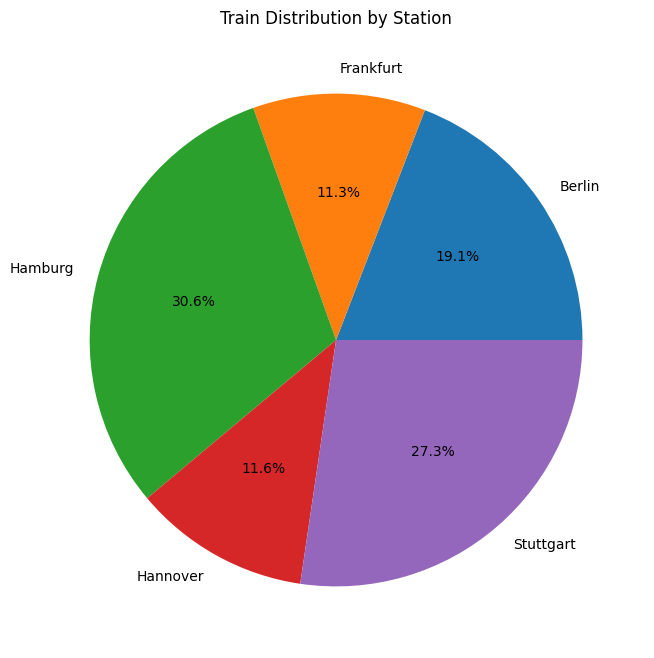

In [23]:
# Pie Chart for Train Distribution
plt.figure(figsize=(8, 8))
plt.pie(aggregated_data['Arrivals'], labels=aggregated_data['Station'], autopct='%1.1f%%')
plt.title('Train Distribution by Station')
plt.show()

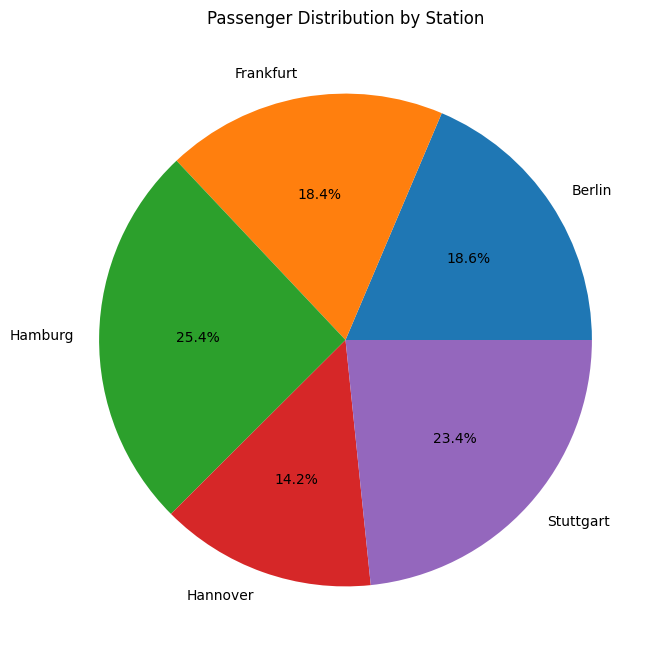

In [24]:
# Pie Chart for Passenger Distribution
plt.figure(figsize=(8, 8))
plt.pie(aggregated_data['Passengers'], labels=aggregated_data['Station'], autopct='%1.1f%%')
plt.title('Passenger Distribution by Station')
plt.show()

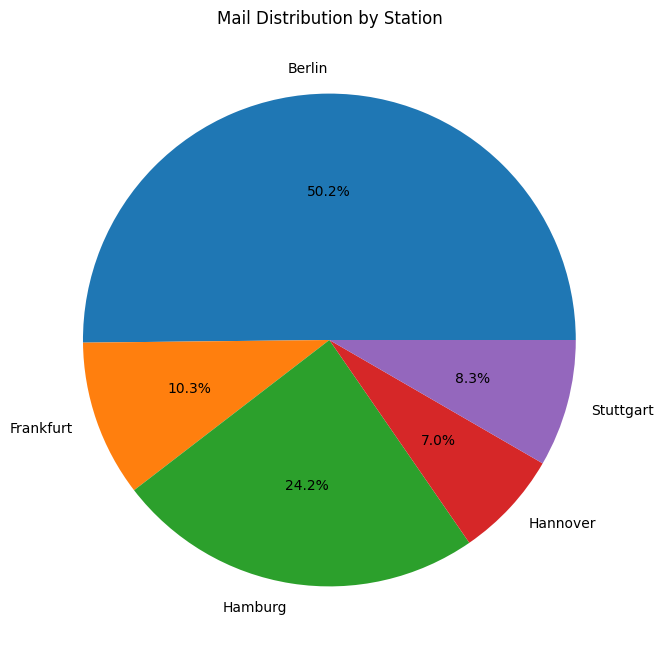

In [25]:
# Pie Chart for Mail Distribution
plt.figure(figsize=(8, 8))
plt.pie(aggregated_data['Mail'], labels=aggregated_data['Station'], autopct='%1.1f%%')
plt.title('Mail Distribution by Station')
plt.show()

##  Analysis of Results

### Summary of Data:
The analysis was performed on the **`Stations_Data.csv`** file, focusing on the following metrics:
1. **Arrivals (Trains)**
2. **Passengers**
3. **Mail**

The data was **grouped by station**, and the proportions for each metric were calculated.

### Top 5 Stations by Distribution:

| Station    | Arrivals | Passengers | Mail     | Train Proportion (%) | Passenger Proportion (%) | Mail Proportion (%) |
|-----------|---------:|----------:|---------:|----------------------:|-------------------------:|----------------------:|
| Hamburg   | 244,224  | 74,362,990 | 6,807.81 | 30.65                 | 25.44                    | 24.18                 |
| Stuttgart | 217,744  | 68,289,029 | 2,350.31 | 27.32                 | 23.36                    | 8.35                  |
| Berlin    | 152,447  | 54,401,142 | 14,127.36| 19.13                 | 18.61                    | 50.17                 |
| Hannover  | 92,244   | 41,394,661 | 1,982.04 | 11.58                 | 14.16                    | 7.04                  |
| Frankfurt | 90,242   | 53,823,771 | 2,890.04 | 11.32                 | 18.42                    | 10.26                 |

---

### Insights:
1. **Train Distribution:**
   - **Hamburg** has the highest proportion of train arrivals (30.65%), followed by **Stuttgart (27.32%)**.
   - **Frankfurt** has the lowest train proportion (11.32%) among the top 5 stations.

2. **Passenger Distribution:**
   - **Hamburg** also has the highest passenger proportion (25.44%), making it the busiest station.
   - **Stuttgart (23.36%)** and **Berlin (18.61%)** follow closely.

3. **Mail Distribution:**
   - **Berlin** handles the highest proportion of mail (50.17%), significantly higher than any other station.
   - **Hamburg (24.18%)** and **Frankfurt (10.26%)** are also key mail distribution centers.

---

## Interpretation of Results

1. **Resource Allocation:**
   - Stations with a **high concentration of train arrivals** (like Hamburg and Stuttgart) may need **more maintenance facilities**.
   - **Passenger-heavy stations** (like Hamburg and Stuttgart) require **better service management**.

2. **Mail Logistics:**
   - Since **Berlin** handles over half of the total mail traffic, it might benefit from **dedicated logistics infrastructure**.

3. **Operational Efficiency:**
   - Analyzing why **Hamburg and Stuttgart** are the top hubs for both trains and passengers can provide insights into **successful management practices**.

---

##  Conclusion
The distribution analysis reveals that:
- **Hamburg and Stuttgart** are dominant in both **train and passenger traffic**.
- **Berlin** leads significantly in **mail handling**.
- These insights are essential for **resource optimization, passenger management, and logistics planning** at the railway stations.

By identifying key hubs and underutilized stations, railway managers can **optimize resource allocation**, **enhance passenger experience**, and **improve logistics management**.


##  Student Contribution

**Implemented by student**: 
- Yasamin Ebrahimi (1232162)  - 33.333%
- Henrique Silva (1240588)    - 33.333%
- Duarte Miguel Carneiro Machado (1240586)  - 33.333%